In [8]:
%matplotlib inline
import sys
#sys.path.append("/Users/mmeier/Desktop/new_arena/")
sys.path.append("/Users/serbe/Documents/GitHub/new_arena/")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import pylab

In [9]:
fly0_LO = np.load('T4T5_ctrl_bar_PDND_2016-11-29_15.41LO.npy').mean(2)
fly0_ME = np.load('T4T5_ctrl_bar_PDND_2016-11-29_15.41ME.npy').mean(2)
fly0_LP = np.load('T4T5_ctrl_bar_PDND_2016-11-29_15.41LP.npy').mean(2)

fly1_LO = np.load('T4T5_ctrl_bars_2016-11-16_17.01LO.npy').mean(2)
fly1_ME = np.load('T4T5_ctrl_bars_2016-11-16_17.01ME.npy').mean(2)
fly1_LP = np.load('T4T5_ctrl_bars_2016-11-16_17.01LP.npy').mean(2)

fly2_LO = np.load('T4T5_ctrl_barwidth_PDND_2016-11-10_16.46LO.npy').mean(2)
fly2_ME = np.load('T4T5_ctrl_barwidth_PDND_2016-11-10_16.46ME.npy').mean(2)
fly2_LP = np.load('T4T5_ctrl_barwidth_PDND_2016-11-10_16.46LP.npy').mean(2)

fly3_LO = np.load('T4T5_SHI_ctrl_barwidth_2016-11-30_15.10LO.npy').mean(2)
fly3_ME = np.load('T4T5_SHI_ctrl_barwidth_2016-11-30_15.10ME.npy').mean(2)
fly3_LP = np.load('T4T5_SHI_ctrl_barwidth_2016-11-30_15.10LP.npy').mean(2)

#fly4_LO = np.load('T4T5_ctrl_edges_2016-11-16_14.59LO.npy').mean(2)
#fly4_ME = np.load('T4T5_ctrl_edges_2016-11-16_14.59ME.npy').mean(2)
#fly4_LP = np.load('T4T5_ctrl_edges_2016-11-16_14.59LP.npy').mean(2)

#fly5_LO = np.load('T4T5_ctrl_edges_2016-11-18_18.32LO.npy').mean(2)
#fly5_ME = np.load('T4T5_ctrl_edges_2016-11-18_18.32ME.npy').mean(2)
#fly5_LP = np.load('T4T5_ctrl_edges_2016-11-18_18.32LP.npy').mean(2)

single_tuningsLO = np.array([fly0_LO, fly1_LO, fly2_LO, fly3_LO])
single_tuningsME = np.array([fly0_ME, fly1_ME,fly2_ME, fly3_ME])
single_tuningsLP = np.array([fly0_LP, fly1_LP,fly2_LP, fly3_LP])

SEM_LO = stats.sem(single_tuningsLO)
SEM_ME = stats.sem(single_tuningsME)
SEM_LP = stats.sem(single_tuningsLP)

mean_tuningLO = np.mean(single_tuningsLO, axis = 0)
mean_tuningME = np.mean(single_tuningsME, axis = 0)
mean_tuningLP = np.mean(single_tuningsLP, axis = 0)

mean_tuning = np.array([mean_tuningLO, mean_tuningME, mean_tuningLP])
SEMs = np.array([SEM_LO, SEM_ME, SEM_LP])

In [3]:
fly0_LO = np.load('T4T5_SHI_ctrl_barwidth_2016-11-30_15.10LO.npy')
print(np.shape(fly0_LO))

(2L, 7L, 5L)


In [6]:
print(np.shape(single_tuningsLO))
print(np.shape(SEM_LO))
print(np.shape(mean_tuningLO))
print(np.shape(mean_tuning))
print(np.shape(SEMs))

(4L, 7L)
(7L,)
(7L,)
(3L, 7L)
(3L, 7L)


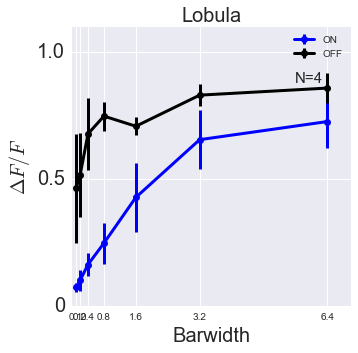

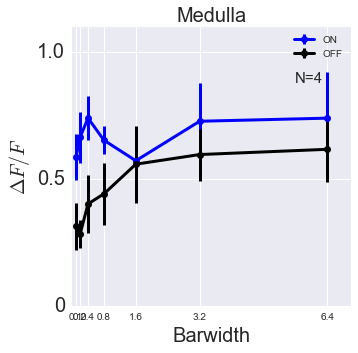

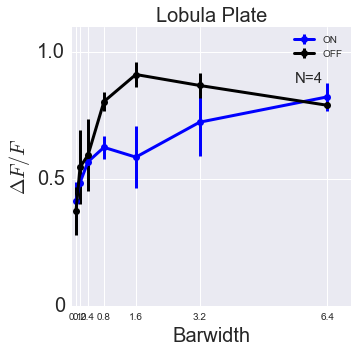

In [11]:
# plot everything

regions = [0,1,2]

for region in regions:
    plt.figure(figsize = (5,5))
    ax = plt.subplot(111)
    
    # here, we manually define the x-axis
    orientation_tuning = [0.1,0.2,0.4,0.8,1.6,3.2,6.4]

    # plot mean tuning as solid line
    plt.errorbar(orientation_tuning, mean_tuning[region,0,:], yerr=SEMs[region,0,:], color = 'b', linewidth = 3.0, marker = 'o')
    plt.errorbar(orientation_tuning, mean_tuning[region,1,:], yerr=SEMs[region,1,:], color = 'k', linewidth = 3.0, marker = 'o')

    # define the x-axis and ticks etc...
    ax.set_xlim([0,7])
    ax.set_xticks([0.1,0.2,0.4,0.8,1.6,3.2,6.4])
#     ax.set_xticklabels(['left','up','right','down'], fontsize = 15.)
    ax.set_xlabel('Barwidth', fontsize = 20.)

    # define the y-axis and ticks etc...
    plt.ylim([0,1.1])
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_yticklabels([0, 0.5, 1.0], fontsize = 20.)
    ax.set_ylabel('$\Delta F/F$', fontsize = 20.)
    plt.legend(['ON', 'OFF'])
    
    
    if region == 0:
        plt.title ("Lobula", fontsize = 20.)
        open('dir_tun' + 'LO.npy','w')
        np.save('dir_tun' + 'LO.npy', mean_tuning)
        ax.text(0.8, 0.8, "N={0}".format(np.shape(single_tuningsLO)[0]), transform=ax.transAxes, fontsize=15)
        pylab.savefig('dir_tun' + 'LO.png')
        
    elif region == 1:
        plt.title ("Medulla", fontsize = 20.)
        open('dir_tun' + 'ME.npy','w')
        np.save('dir_tun' + 'ME.npy', mean_tuning)
        ax.text(0.8, 0.8, "N={0}".format(np.shape(single_tuningsME)[0]), transform=ax.transAxes, fontsize=15)
        pylab.savefig('dir_tun' + 'ME.png')
        
    elif region == 2:
        plt.title ("Lobula Plate", fontsize = 20.)
        open('dir_tun' + 'LP.npy','w')
        np.save('dir_tun' + 'LP.npy', mean_tuning)
        ax.text(0.8, 0.8, "N={0}".format(np.shape(single_tuningsLP)[0]), transform=ax.transAxes, fontsize=15)
        pylab.savefig('dir_tun' + 'LP.png')
        